
**Статистика (оценка)** $T(X)$ --- измеримая функция от выборки.

**Несмещённая оценка** параметра $\theta$ --- статистика $T(X)$, т.ч. $\mathbb{E_{\theta}}~T(X) = \theta$


**Асимптотически несмещённая оценка** параметра $\theta$ --- статистика $T(X)$, т.ч. $\mathbb{E_{\theta}}~T(X) \xrightarrow[n \to \infty]{} \theta$.

**Состоятельная оценка** параметра $\theta$ --- статистика $T(X)$, т.ч. $ T(X) \xrightarrow[n \to \infty]{p} \theta$.

**Сильно состоятельная оценка** параметра $\theta$ --- статистика $T(X)$, т.ч. $ T(X) \xrightarrow[n \to \infty]{п.н.} \theta$.

**Оптимальная оценка** параметра $\theta$ --- статистика $T(X)$:

1. $\mathbb{E_{\theta}}~T(X) = \theta$, т.е. $T$~--- несмещённая.
2. $T(X)$ имеет равномерно минимальную дисперсию, т.е. для любой другой несмещённой оценки $T_{1}(X)$ параметра $\theta$ :
    
    ${\mathbb{D} ~T(X) \leqslant \mathbb{D} ~T_{1}(X)}  {~~\forall~~\theta}$.

Статистика $T(X)$ называется **асимптотически нормальной**, если существуют такие 
$a_n(\theta), \sigma_n(\theta)$, что $\cfrac{T_n(X) - a_n(\theta)}{\sigma_n(\theta)} \xrightarrow[n \to \infty]{\text{d}} \xi \sim N(0, 1)$.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### Проиллюстрируем свойство несмещенности

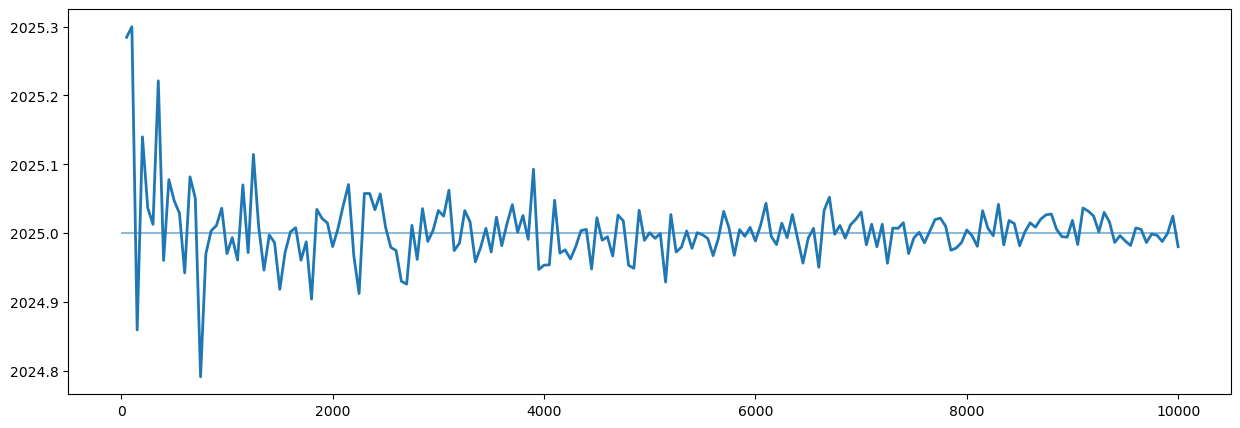

In [2]:
estimations = []
sizes = [i for i in range(50,10001,50)]
for size in sizes:
    sample = stats.norm.rvs(loc = 2025, scale = 2, size = size)
    estimations += [sample.mean()]

plt.figure(figsize=(15, 5))
plt.hlines(2025, 0, size, alpha=0.5)
plt.plot(sizes,estimations, lw = 2)
plt.show()

### Проиллюстрируем отсуствие несмещенности

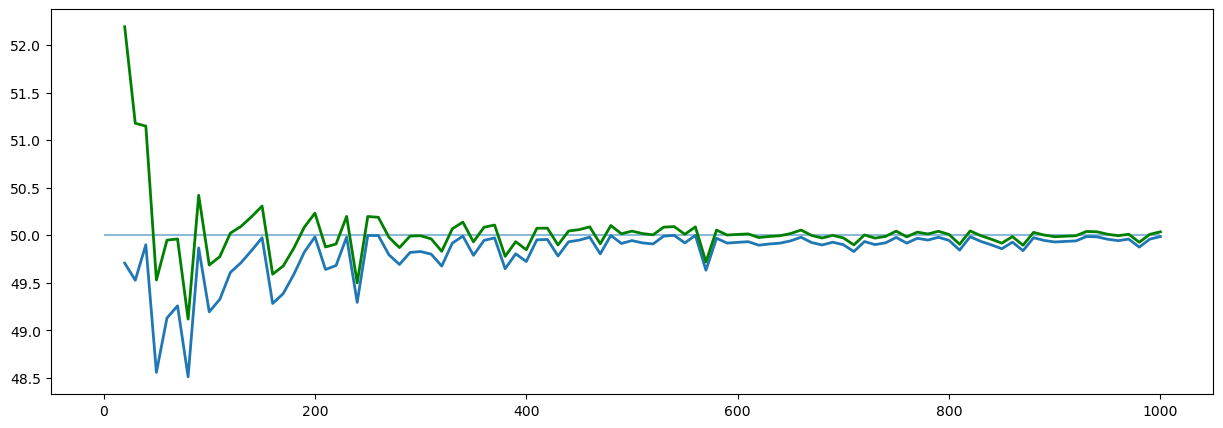

In [7]:
estimations = []
unbiased_estimations = []
sizes = [i for i in range(20,1001,10)]
for size in sizes:
    sample = stats.uniform.rvs(loc = 0, scale = 50, size = size)
    estimations += [sample.max()]
    unbiased_estimations += [sample.max()*(size+1)/size]

plt.figure(figsize=(15, 5))
plt.hlines(50, 0, size, alpha=0.5, lw = 1.5)
plt.plot(sizes,estimations, lw = 2)
plt.plot(sizes,unbiased_estimations, lw = 2, c = 'green')
#plt.ylim((45,55))
plt.show()

In [ ]:
estimations = []
unbiased_estimations = []
sizes = [i for i in range(20,10001,50)]
for size in sizes:
    sample = stats.uniform.rvs(loc = 2020, scale = 5, size = size)
    estimations += [sample.max()]
    unbiased_estimations += [sample.max()*(size+1)/size]

plt.figure(figsize=(15, 5))
plt.hlines(2025, 0, size, alpha=0.5, lw = 1.5)
plt.plot(sizes,estimations, lw = 2)
plt.plot(sizes,unbiased_estimations, lw = 2, c = 'green')
plt.ylim((2020,2030))
plt.show()

### Проиллюстрируем свойство состоятельности

In [ ]:
estimations = []
sizes = [i for i in range(100,40001,100)]
for size in sizes:
    sample = stats.uniform.rvs(loc = 0, scale = 100, size = size)
    estimations += [sample.mean()*2]

plt.figure(figsize=(15, 5))
plt.hlines(100, 0, size, alpha=0.5)
plt.plot(sizes,estimations, lw = 0.8)
plt.show()

### Проиллюстрируем отсутствие состоятельности

In [ ]:
estimations = []
sizes = [i for i in range(100,50001,100)]
for size in sizes:
    sample = stats.uniform.rvs(loc = 0, scale = 100, size = size)
    estimations += [sample.min()*(size+1)] #является несмещенной

plt.figure(figsize=(15, 5))
plt.hlines(100, 0, size, alpha=0.5)
plt.plot(sizes,estimations, lw = 0.8)
plt.show()

### Проиллюстрируем оптимальность

In [ ]:
estimations = []
unbiased_estimations = []
sizes = [i for i in range(20,10001,100)]
for size in sizes:
    sample = stats.uniform.rvs(loc = 0, scale = 100, size = size)
    estimations += [sample.max()]
    unbiased_estimations += [sample.max()*(size+1)/size]

plt.figure(figsize=(15, 5))
plt.hlines(60, 0, size, alpha=0.5, lw = 1)
plt.plot(sizes,estimations, lw = 2)
plt.plot(sizes,unbiased_estimations, lw = 2, c = 'green')
plt.ylim((95,105))
plt.show()

In [ ]:
print(np.array(estimations).var()) #неоптимальная оценка
print(np.array(unbiased_estimations).var()) #оптимальная оценка

### Проиллюстрируем асимптотическую нормальность

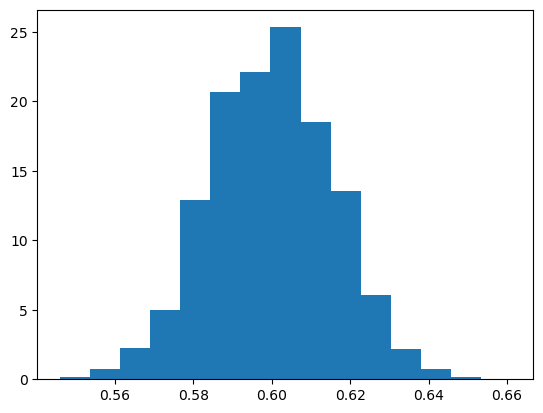

In [81]:
estimations = []
size = 1000
for _ in range(10**4):
    sample = stats.bernoulli.rvs(p = 0.6, size = size)
    estimations += [sample.mean()]
plt.hist(estimations, bins = 15, density=True)
plt.show()

### Проиллюстрируем отсутствие асимптотической нормальности

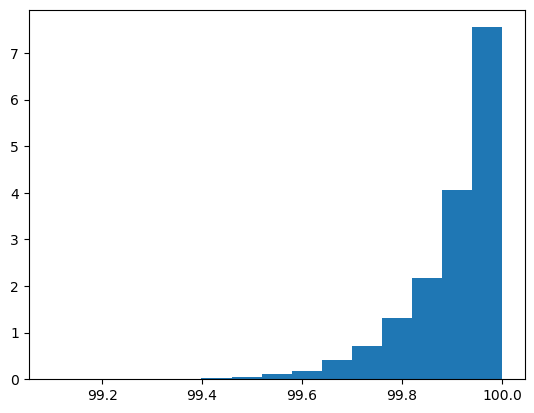

In [80]:
estimations = []
size = 1000
for _ in range(10**4):
    sample = stats.uniform.rvs(loc = 0, scale = 100, size = size)
    estimations += [sample.max()]
plt.hist(estimations,density=True, bins = 15)
plt.show()

## Доверительные интервалы

**Доверительный интервал** для параметра $\theta$ с коэффициентом доверия $\gamma \in (0, 1)$ --- интервал $\bigl(T_1(X), T_2(X)\bigr)$, где $T_i$ --- статистики, т.ч.:
1. $T_1(X) \overset{\text{п.н.}}{\leqslant} T_2({X})$;
2. $\mathbb{P} \Bigl(T_1(X) \leqslant \theta \leqslant T_2(X) \Bigr) \geqslant \gamma$.

**Теорема Фишера**


**Известные доверительные интервалы для параметров нормального распределения**

### Доверительный интервал для математического ожидания при известной дисперсии

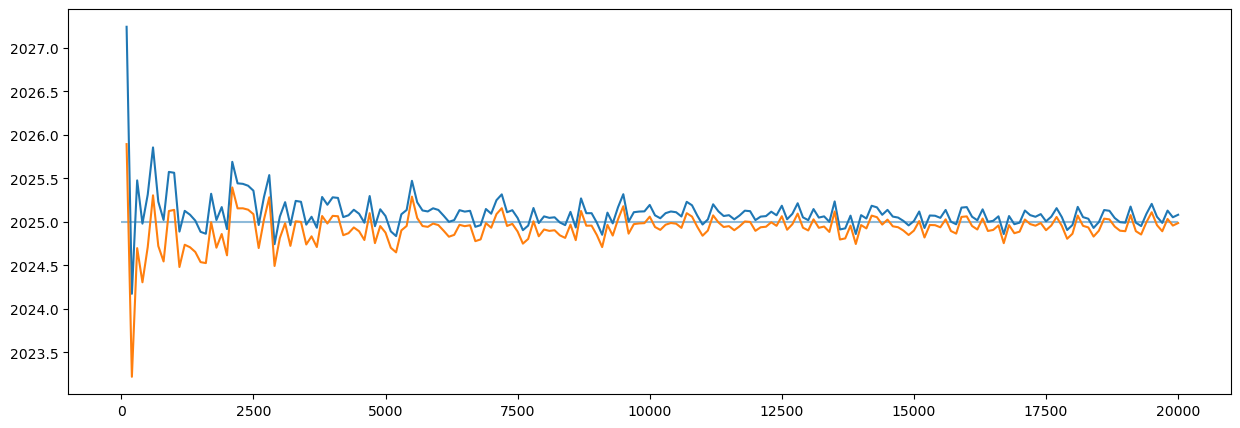

In [9]:
bound_left = []
bound_right = []
gamma = 0.5
mu = 2025
sigma = 10
sizes = [i for i in range(100,20001,100)]
for size in sizes:
    sample = stats.norm.rvs(loc = mu, scale = sigma, size = size)
    bound_left += [sample.mean() - sigma/size**(0.5)*stats.norm.ppf((1-gamma)/2)]
    bound_right += [sample.mean() - sigma/size**(0.5)*stats.norm.ppf((1+gamma)/2)]

plt.figure(figsize=(15, 5))
plt.hlines(mu, 0, size, alpha=0.5)
plt.plot(sizes,bound_left, lw = 1.5)
plt.plot(sizes,bound_right, lw = 1.5)
plt.show()

In [5]:
# Посчитать сколько раз параметр не попал в доверительный интервал
print(np.sum(np.array(bound_left) > mu) + np.sum(np.array(bound_right) < mu))
print(np.sum(np.array(bound_left) > mu) + np.sum(np.array(bound_right) < mu) / len(sizes))

371
185.93


### Доверительный интервал для математического ожидания при НЕизвестной дисперсии

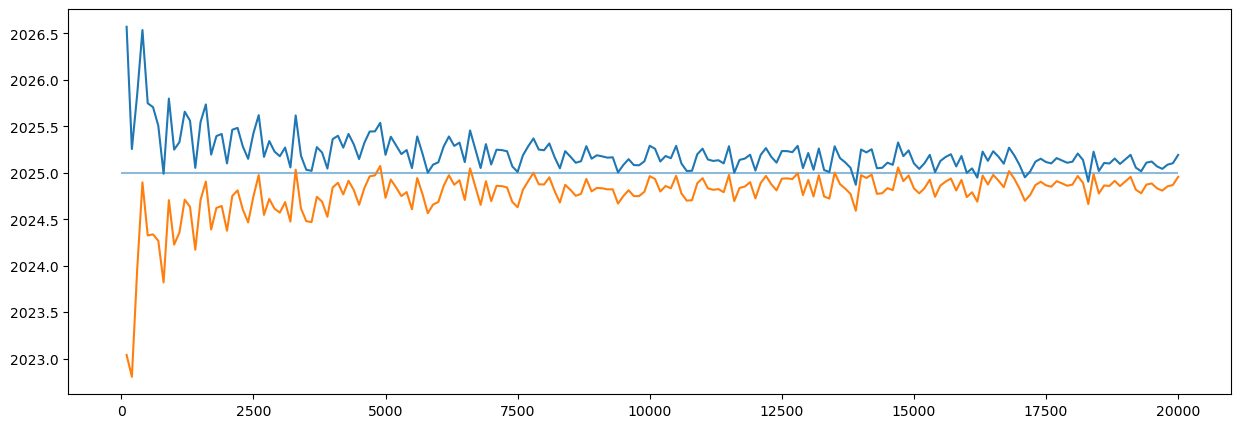

In [93]:
bound_left = []
bound_right = []
gamma = 0.9
mu = 2025
sigma = 10
sizes = [i for i in range(100,20001,100)]
for size in sizes:
    sample = stats.norm.rvs(loc = mu, scale = sigma, size = size)
    bound_left += [sample.mean() - sample.std()/size**(0.5)*stats.t.ppf((1-gamma)/2,df = size-1)]
    bound_right += [sample.mean() - sample.std()/size**(0.5)*stats.t.ppf((1+gamma)/2,df = size-1)]

plt.figure(figsize=(15, 5))
plt.hlines(mu, 0, size, alpha=0.5)
plt.plot(sizes,bound_left, lw = 1.5)
plt.plot(sizes,bound_right, lw = 1.5)
plt.show()

### Доверительный интервал для дисперсии при известном математическом ожидании

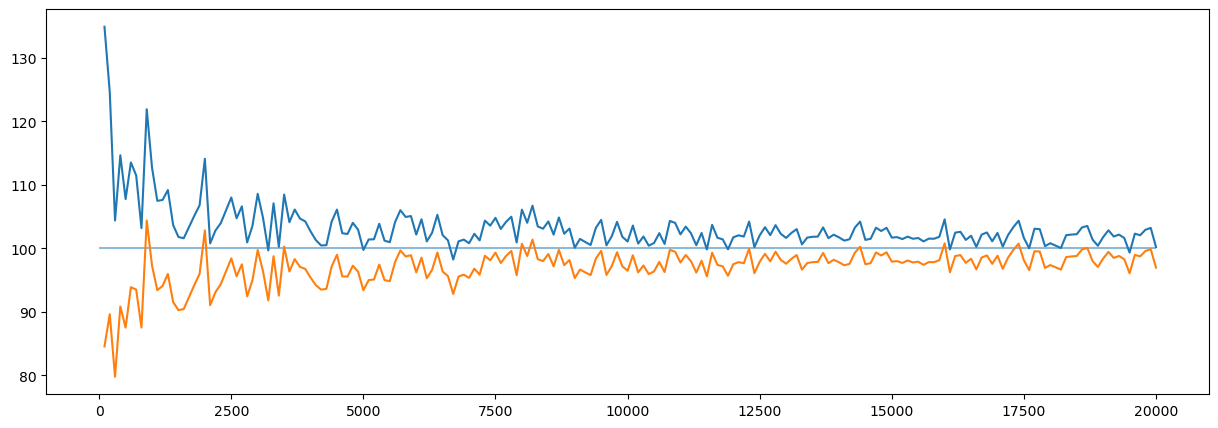

In [98]:
bound_left = []
bound_right = []
gamma = 0.9
mu = 2025
sigma = 10
sizes = [i for i in range(100,20001,100)]
for size in sizes:
    sample = stats.norm.rvs(loc = mu, scale = sigma, size = size)
    bound_left += [size*((sample-mu)**2).mean()/stats.chi2.ppf((1-gamma)/2,df = size)]
    bound_right += [size*((sample-mu)**2).mean()/stats.chi2.ppf((1+gamma)/2,df = size)]

plt.figure(figsize=(15, 5))
plt.hlines(sigma**2, 0, size, alpha=0.5)
plt.plot(sizes,bound_left, lw = 1.5)
plt.plot(sizes,bound_right, lw = 1.5)
plt.show()

### Доверительный интервал для дисперсии при НЕизвестном математическом ожидании

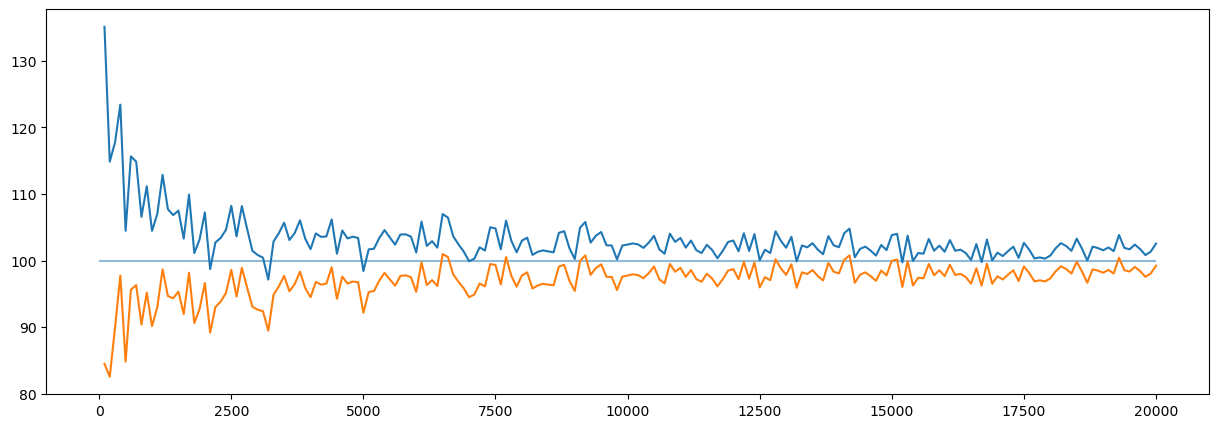

In [95]:
bound_left = []
bound_right = []
gamma = 0.9
mu = 2025
sigma = 10
sizes = [i for i in range(100,20001,100)]
for size in sizes:
    sample = stats.norm.rvs(loc = mu, scale = sigma, size = size)
    bound_left += [(size-1)*sample.var()/stats.chi2.ppf((1-gamma)/2,df = size-1)]
    bound_right += [(size-1)*sample.var()/stats.chi2.ppf((1+gamma)/2,df = size-1)]

plt.figure(figsize=(15, 5))
plt.hlines(sigma**2, 0, size, alpha=0.5)
plt.plot(sizes,bound_left, lw = 1.5)
plt.plot(sizes,bound_right, lw = 1.5)
plt.show()